This is the new file for deep learning

<font color ='red'><h4><b>Fashion classification / Tensorflow and Keras</h4><font>

In [24]:
import tensorflow as tf

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

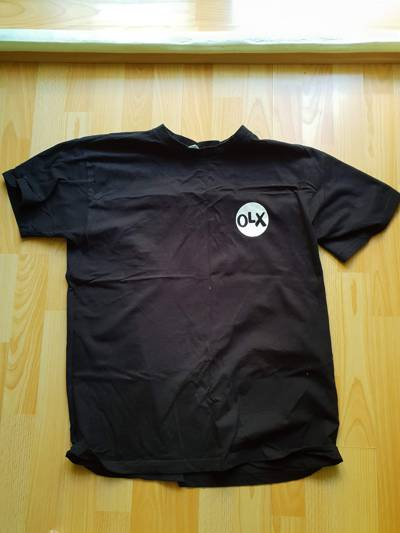

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname,target_size=(299,299))

In [7]:
print(img)  # PIL is python image library

<PIL.Image.Image image mode=RGB size=299x299 at 0x7ABA27FE6B70>


In [8]:
# converting the image to numpy array
np.array(img) # RGB value of pixels 

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [9]:
x = np.array(img)
x.shape # as in the the image is 299 pixels wide and 299 pixels long with 3 channels r,g,b

(299, 299, 3)

In the next session we will see that how to use pre-trained neural networks to see what is in this image

<font color ='red'><h4><b>Pre-trained Convolutional Neural Network</h4><font> <br>

Imagenet dataset: https://www.image-net.org/
Pre-trained models: https://keras.io/api/applications/

In [10]:
# keras application has a lot of pre-trained models that we can use to classify images. These models are trained on the imagenet dataset.
#These models have different architectures and complexity levels based on how the layers are connected and how many layers are there in the model.
#Regarding the model we have information like what is the accuracy, how fast it is, how much memory it takes, how many parameters it has, etc.
# we usually choose Xception model as it is a good tradeoff between accuracy and speed.

from tensorflow.keras.applications.xception import Xception

In [11]:
model = Xception(weights = 'imagenet',input_shape = (299,299,3)) #weights imganet signifies that we are using the pre-trained model on imagenet dataset

#at the first time we run this code, it will download the weights of the model from the internet and store it in the cache directory of the keras.

2024-12-22 15:59:45.093675: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# model.predict(x) # this will give an error as the model expects the input to be in the form of batch i.e it expects multiple images. So we need to add an extra dimension to the input. that indicated the number of images.

X=np.array([x]) # we are adding an extra dimension to the input. so we can give multiple image as input like X=np.array([x1,x2,x3,x4,x5])
X.shape


(1, 299, 299, 3)

In [13]:
# for example 
Y=np.array([x,x,x,x,x]) # in this case we are giving 5 images as input hence the extra dimension will have value 5
Y.shape

(5, 299, 299, 3)

In [14]:
model.predict(X) # this will give the output of the model. The output is the probability of the image belonging to each of the 1000 classes in the imagenet dataset.
# currently the output will not make sense so we need to do some preprocessing to get the output in a human readable format.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [15]:
# we can see the output is mostly 0 or tiny since this model expects the data to be in a certain format. The model expects the input to be in the range of -1 to 1.
# hence to preprocess we import a function called preprocess_input from the keras.applications.xception module.

from tensorflow.keras.applications.xception import preprocess_input

In [16]:
X = preprocess_input(X) # this will preprocess the input data so that the model can understand it.

In [17]:
X[0] # now if we take a look at the numbers they are in the range of -1 to 1 that is needed by the model. they are not in the range of 0-255

array([[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.4039216 ,  0.3411765 , -0.2235294 ],
        [ 0.41960788,  0.35686278, -0.20784312],
        ...,
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.9843137 ,  0.94509804],
        [ 0.96862745,  0.99215686,  0.9372549 ]],

       [[ 0.47450984,  0.4039216 , -0.12156862],
        [ 0.4666667 ,  0.39607847, -0.12941176],
        [ 0.45882356,  0.38823533, -0.15294117],
        ...,
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.9372549 ],
        [ 0.96862745,  0.9764706 ,  0.92941177]],

       [[ 0.56078434,  0.48235297, -0.00392157],
        [ 0.5686275 ,  0.4901961 ,  0.00392163],
        [ 0.5686275 ,  0.49803925, -0.01176471],
        ...,
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863],
        [ 0.9607843 ,  0.96862745,  0.92156863]],

       ...,

       [[ 0.2941177 ,  0.18431377, -0.40392154],
        [ 0

In [18]:
# now lets take a look at the output of the model
model.predict(X) # this will give the output of the model in the form of probabilities. The output is the probability of the image belonging to each of the 1000 classes in the imagenet dataset.
#and now we can see that the output is not all 0 or tiny values. The output is in the form of probabilities. The sum of all the probabilities is 1. The model is predicting that the image belongs to the class with the highest probability.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[3.23712593e-04, 1.57384042e-04, 2.13493462e-04, 1.52370718e-04,
        2.47626536e-04, 3.05036403e-04, 3.20592546e-04, 1.47499493e-04,
        2.03622098e-04, 1.49272615e-04, 1.95663160e-04, 2.10137674e-04,
        7.59265968e-05, 1.13972361e-04, 1.62683747e-04, 2.04638884e-04,
        1.97416433e-04, 1.44288933e-04, 1.40217686e-04, 1.73686203e-04,
        7.46691658e-04, 2.56967236e-04, 2.66809220e-04, 2.96514889e-04,
        3.73603019e-04, 2.77404615e-04, 2.16571338e-04, 2.27270415e-04,
        3.80813464e-04, 1.72166183e-04, 3.05401423e-04, 1.96431589e-04,
        3.92115704e-04, 4.78072296e-04, 2.91751843e-04, 3.25693778e-04,
        1.47395447e-04, 1.62362296e-04, 2.12711035e-04, 1.34028436e-04,
        2.40070935e-04, 6.75212767e-04, 2.54943909e-04, 1.44478952e-04,
        4.12821682e-04, 2.04408730e-04, 3.02958739e-04, 1.49339830e-04,
        1.99653980e-04, 2.27006138e-04, 2.93729681e-04, 2.27444951e-04,
        6.37644902e-04, 7.82616436e-04, 2.49557634e-04, 4.052711

In [19]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [20]:
pred.shape # the output is in the form of a 2D array with 1 row and 1000 columns. The 1000 columns represent the 1000 classes in the imagenet dataset.

(1, 1000)

In [21]:
# now to make sense of the output we need to decode the output. We can use the decode_predictions function from the keras.applications.xception module to decode the output. as we need to know what are the classes that the model is predicting.
from tensorflow.keras.applications.xception import decode_predictions # this makes the predictions human readable

In [22]:
decode_predictions(pred) # this will give the output in a human readable format. The output is a list of tuples. Each tuple contains the class id, the class name, and the probability of the image belonging to that class.

[[('n03595614', 'jersey', np.float32(0.68196285)),
  ('n02916936', 'bulletproof_vest', np.float32(0.038140062)),
  ('n04370456', 'sweatshirt', np.float32(0.03432483)),
  ('n03710637', 'maillot', np.float32(0.011354232)),
  ('n04525038', 'velvet', np.float32(0.0018453649))]]

In [23]:
#it is close but the problem is the model does not has any tshirt class. you can check that by clicking on the json link above. The model has a class called jersey which is similar to a tshirt. The model is predicting that the image belongs to the jersey class with a probability of 0.99.


Now this means that we need to train a different model. that has classes that we need for our particular case. The good news is that we do not have to retrain the model from scratch, we can build on the top of this only

In the next session we will see that how neural networks works under the hood and after that we can see the transfer learning and adjust the model as per our need.

<font color ='red'><h4><b>Convolutional Neural Network</h4></font> (Under the hood)

1. Types of Layers : Convolutional and dense
2. Convolutional Layers and filters
3. Dense Layers



in a  convolutional neural network, the first few layers are responsible for detecting simple patterns like edges, lines, and curves. The middle layers are responsible for detecting more complex patterns like shapes and textures. The last few layers are responsible for detecting the entire object in the image. The last layer is responsible for predicting the class of the object in the image.
the Convolutional layers contains simple filters in the first layer and some complex in the middle layer. so the filters slide through the image and detect the patterns in the image. The filters are learned by the model during the training process. The filters are learned in such a way that they can detect the patterns in the image that are important for the classification task.
the output of each filter is a feature map. The feature map is a 2D array that represents the presence of a pattern in the image. These multiple feature maps from the first layer are passed to the next layer having its own filters and producing its own feature maps. 
finally the output of the Convolutional layers is vector representation of the image. This vector representation is one dimensional array.
Now this vector is passed to the Dense layer and where each input is connected to each output. Just like in binary classification we use sigmoid here we use softmax function. The softmax function converts the output of the model into probabilities. The sum of all the probabilities is 1. The model predicts the class with the highest probability.


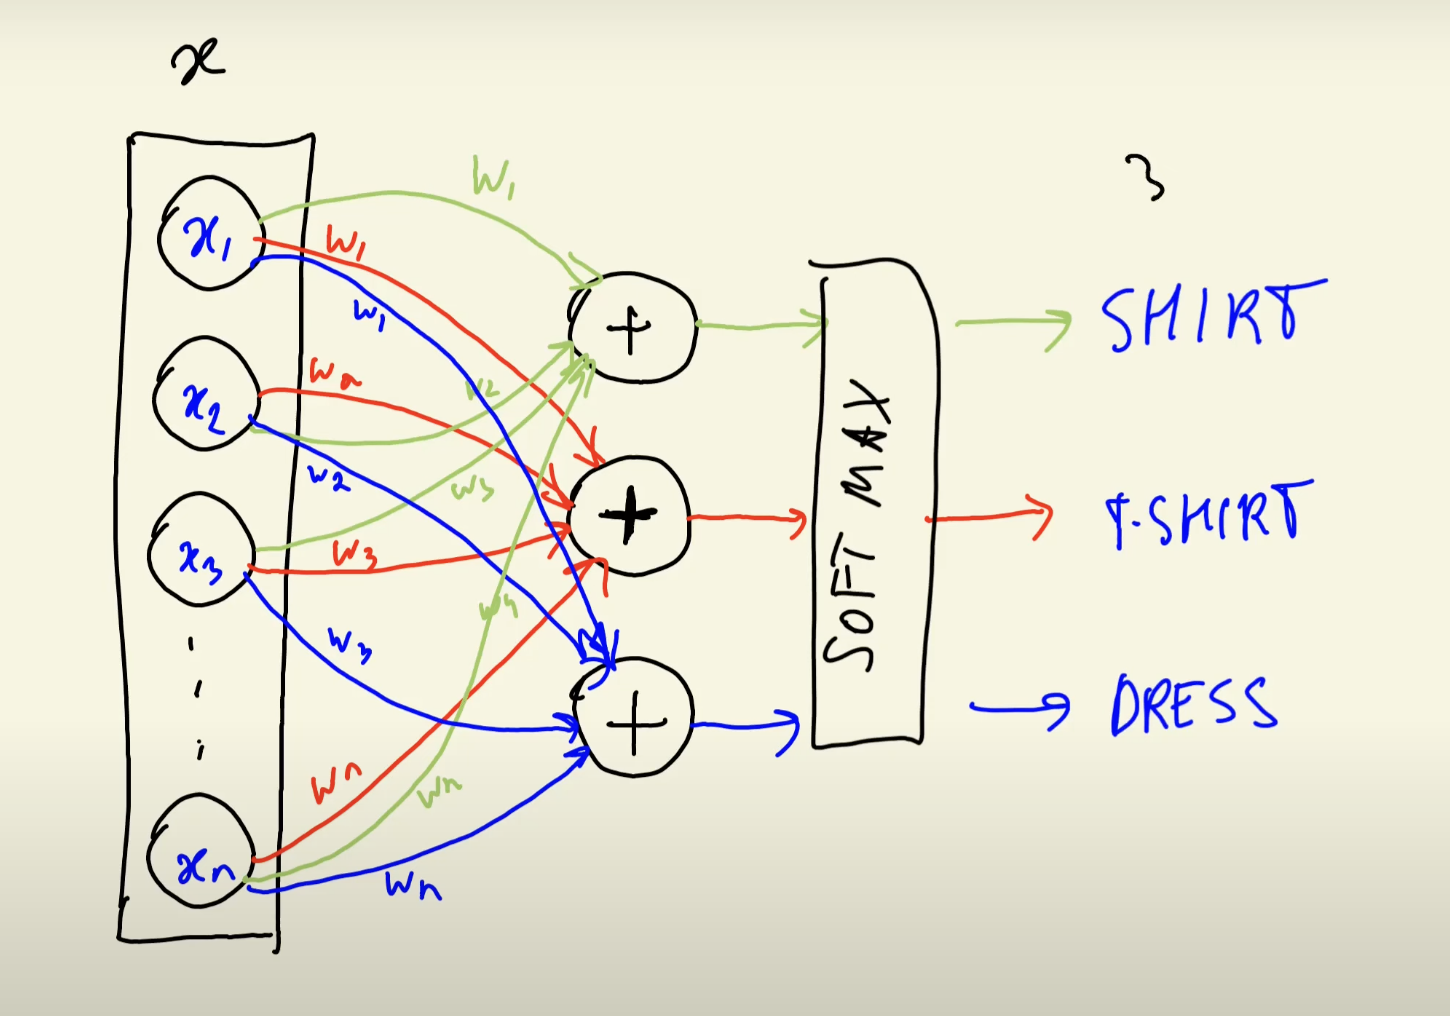 <br>

Dense Layer is nothing other then the matrix multiplication of X with W the is vector representation of the image with the wights vector of each class.<br><br>
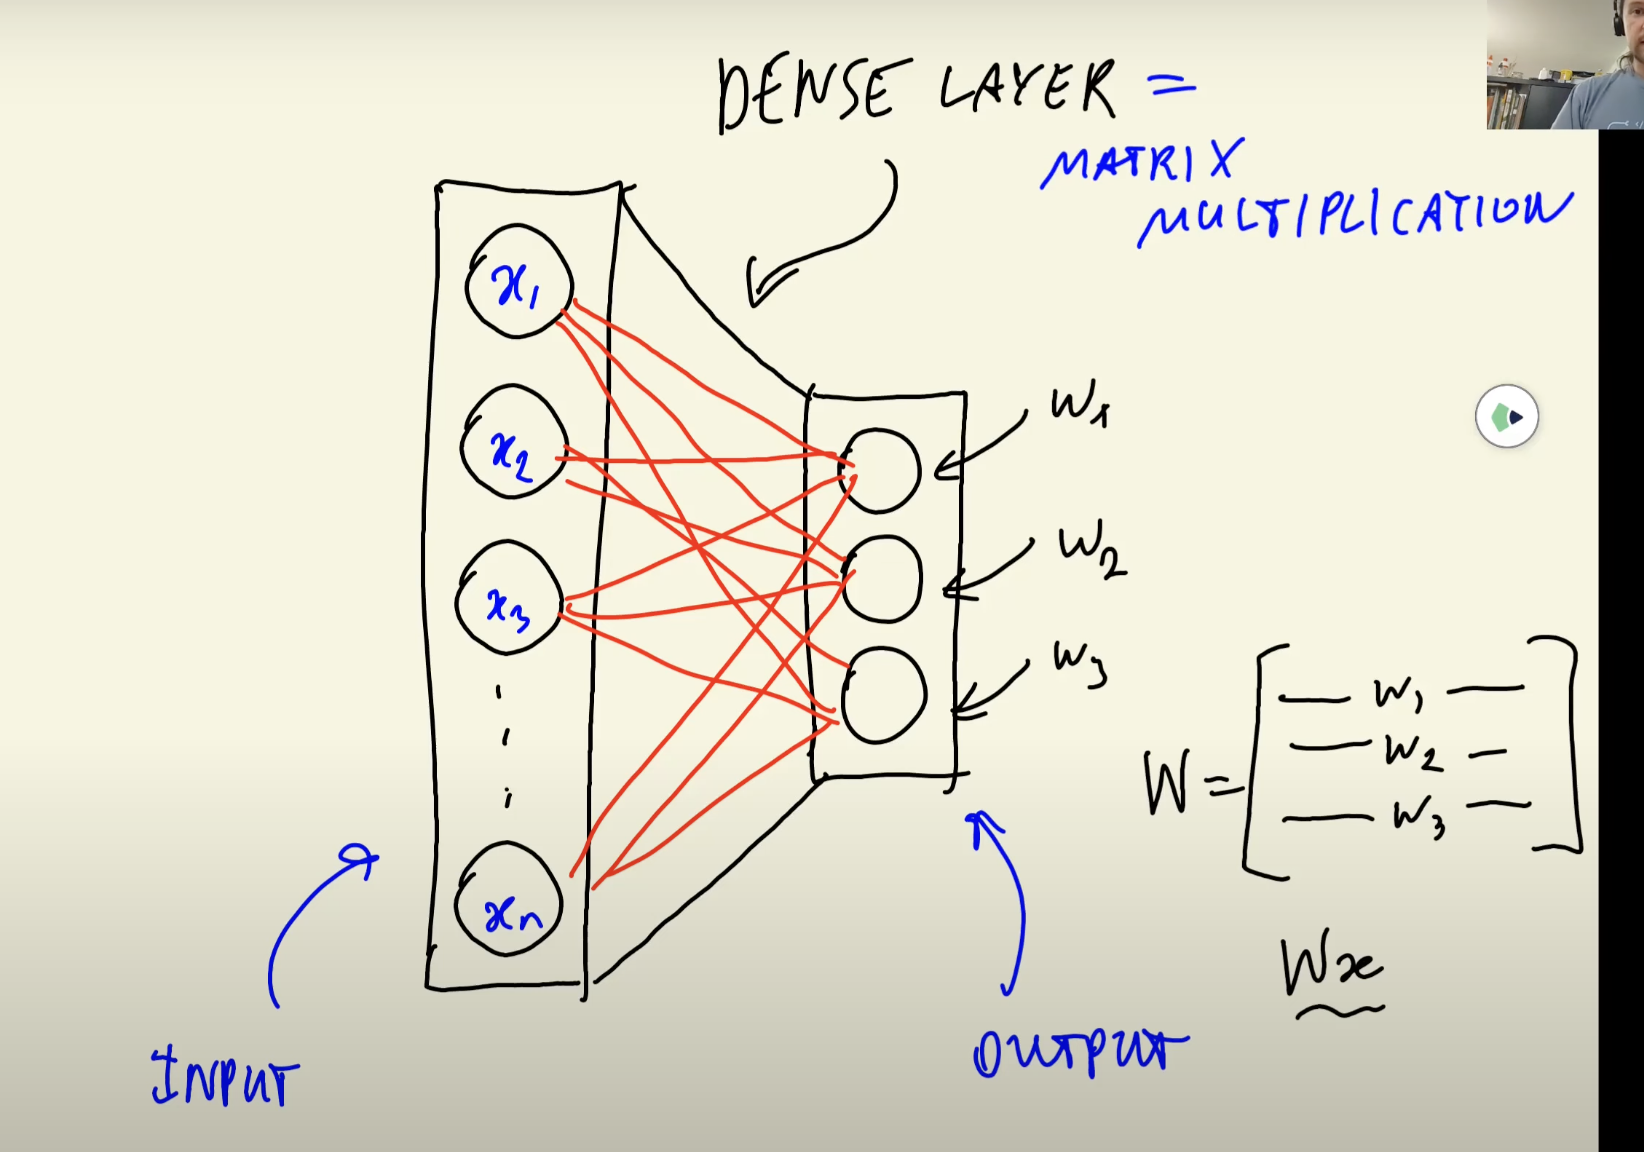 <br><br>
We can put multiple dense layers together. <br><br>
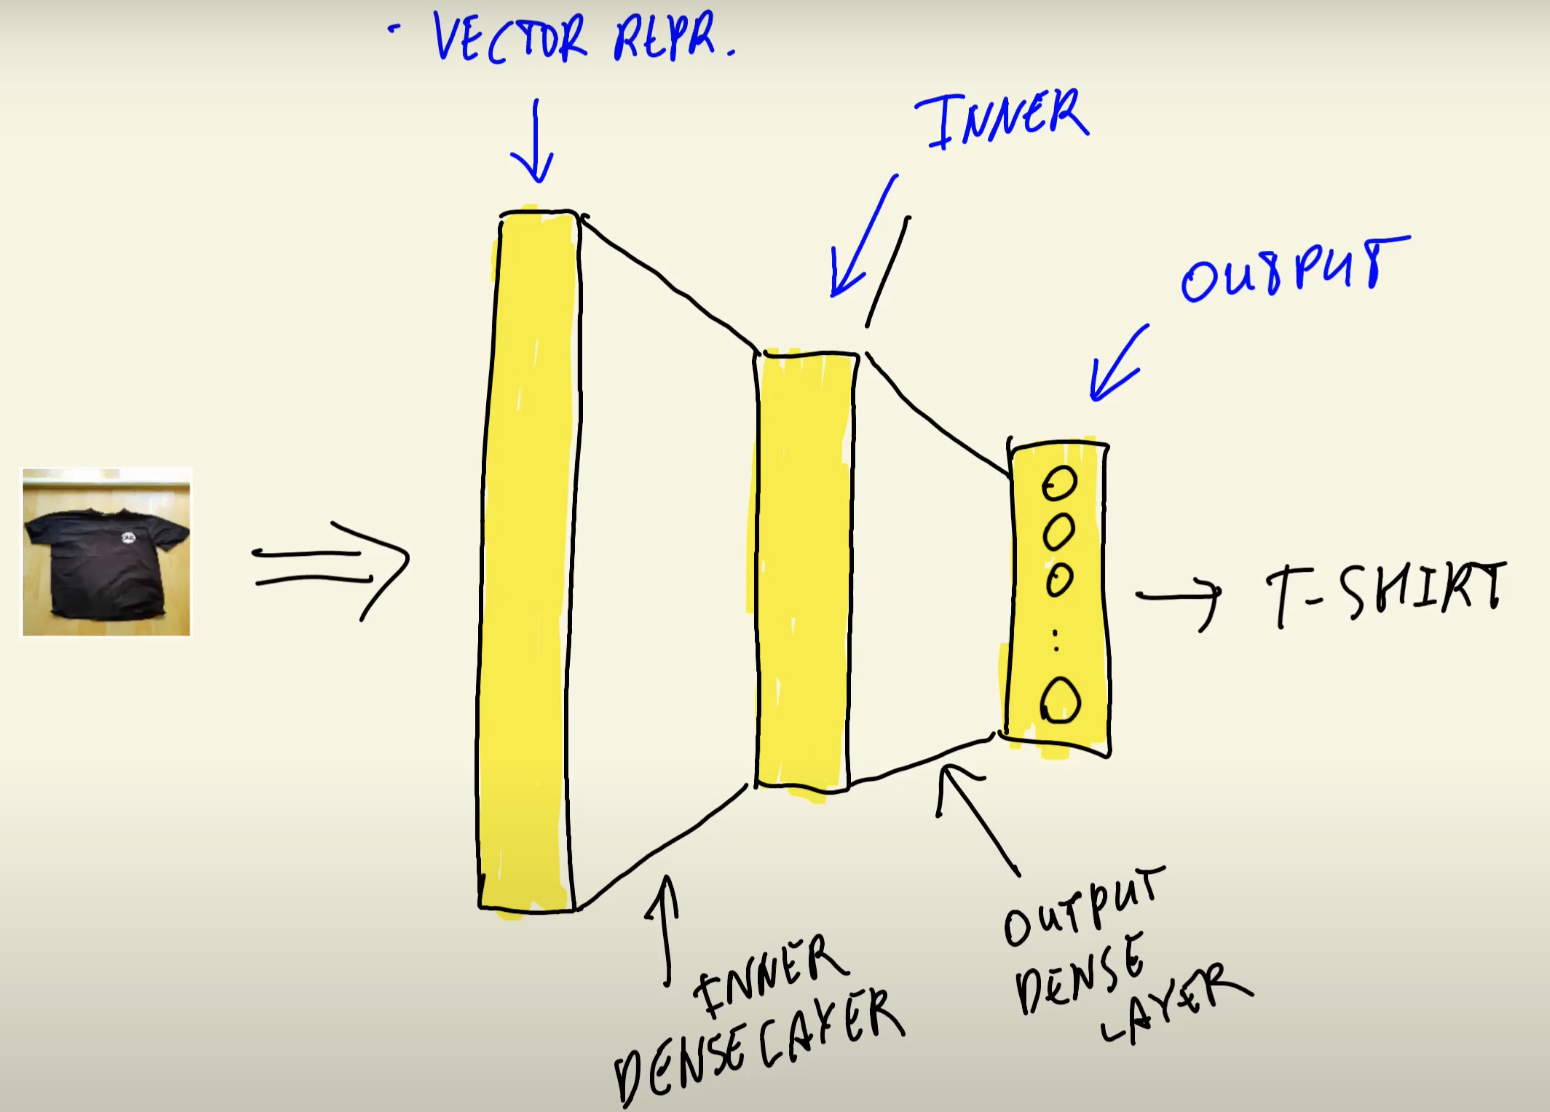<br><br>

There is also one more type of layer that is POOLING LAYER. This is used to make the feature map smaller for example the feature map is of 200*200 then it will make it of 100*100. So it will shrink it.


<font color ='red'><h4><b>Transfer Learning</h4></font>

1. Reading data with ImageDataGenerator
2. Train Xception on smaller images (150X150)




In this we will see that how can we use a pretrained model where the filters are already trained to extract the features from the images. We can use these features to train a new model on a different dataset. This is called transfer learning.
We dont need to change the convolutional layers of the model that are giving the vector representation of the image. We only need to change the dense layers that are used to classify the image. We can remove the dense layers and add our own dense layers to classify the image. Since the existing dense layers are for classfying the images as per the imagenet data classes. <br>

hence the vector representation that we have from the imagenet are useful but the dense layers are not.<br><br>
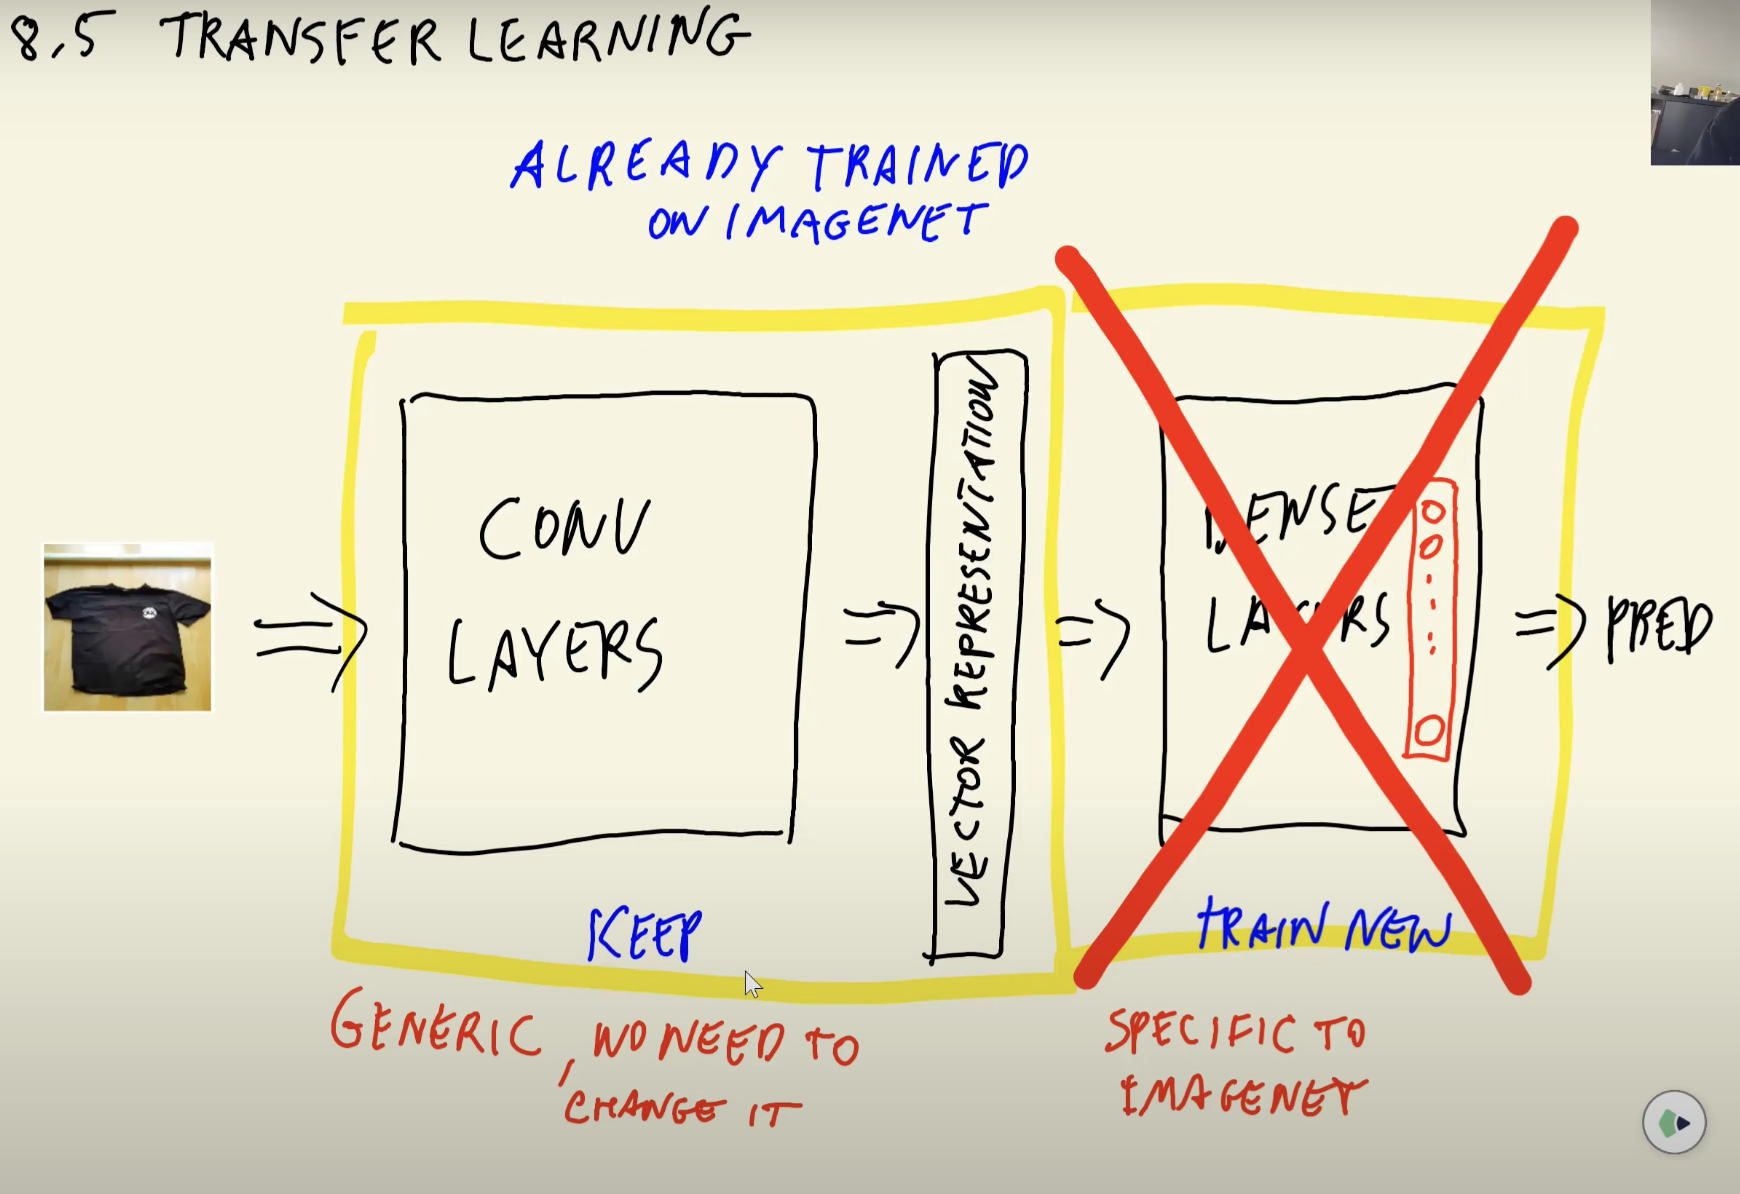 <br><br>
Now lets see how we can do this with keras

